In [126]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors as knn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

file=pd.read_excel(r"C:\Users\sara.brumfield\Documents\DPW Model\Backlog\Overdue Streets and Alleys.xlsx", sheet_name="Sheet1")
#file["Location"]=file[['Longitude', 'Latitude']].apply(tuple, axis=1)
no_null=file.dropna(subset=["Latitude"], axis=0)
df=no_null.loc[no_null["SR Type"].str.contains("Dirty Alley")]
today=datetime.datetime.now()
df["Days Overdue"]=abs((df["Created Date"]-today).dt.days).astype(int)
df

C:\Users\sara.brumfield\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Notes from Sara,Overdue_Status,CompletebyApril,geo_sw_quad,Service Request Number,SR Type,Due Date,Created Date,assigned_to,SR Status,Street Address,Neighborhood,Block_Number_c,Latitude,Longitude,Days Overdue
0,Priority,Overdue,Must Complete,NORTHWEST,19-00887344,SW-Dirty Alley,2019-12-31 12:36:45,2019-12-22 12:36:45,NaN,Pending,"7035 WALLIS AVE, BC",Cross Country,7000.0,39.367006,-76.703261,94
1,Priority,Overdue,Must Complete,NORTHWEST,20-00001618,SW-Dirty Alley,2020-01-13 10:27:17,2020-01-02 10:27:18,NaN,Pending,"1700 W NORTH AVE, BC",Penn North,1700.0,39.309973,-76.645108,83
2,Priority,Overdue,Must Complete,NORTHWEST,20-00051494,SW-Dirty Alley,2020-02-06 12:07:07,2020-01-28 12:07:07,NaN,Pending,"4137 FAIRFAX RD, Baltimore City, 21216",Windsor Hills,4100.0,39.320414,-76.686448,57
3,Priority,Overdue,Must Complete,NORTHWEST,20-00109697,SW-Dirty Alley,2020-03-04 11:30:01,2020-02-24 11:30:01,NaN,Pending,"2800 BOARMAN AVE, Baltimore City, 21215",Towanda-Grantley,2800.0,39.338047,-76.667880,30
4,Priority,Overdue,Must Complete,NORTHWEST,20-00126265,SW-Dirty Alley,2020-03-12 13:47:57,2020-03-03 12:47:57,NaN,Pending,"2900 LAPORTE ST, Baltimore City, 21215",Towanda-Grantley,2900.0,39.338715,-76.670654,22
5,Priority,Overdue,Must Complete,NORTHWEST,20-00131475,SW-Dirty Alley,2020-03-16 11:54:20,2020-03-05 10:54:20,NaN,Pending,"5202 CUTHBERT AVE, Baltimore City, 21215",Arlington,5200.0,39.346593,-76.680971,20
6,Priority,Overdue,Must Complete,NORTHWEST,20-00138625,SW-Dirty Alley,2020-03-18 11:02:59,2020-03-09 11:02:59,NaN,New,"3817 REISTERSTOWN RD, Baltimore City, 21215",Park Circle,3800.0,39.332007,-76.662309,16
7,Priority,Overdue,Must Complete,NORTHWEST,20-00145403,SW-Dirty Alley,2020-03-20 15:41:08,2020-03-11 15:41:09,NaN,Pending,"2300 N MONROE ST, Baltimore City, 21217",Mondawmin,2300.0,39.314216,-76.649526,13
31,Overdue by April 1,Not Overdue,Must Complete,NORTHEAST,20-00151129,SW-Dirty Alley,2020-03-24 17:50:28,2020-03-13 17:50:28,NaN,New,"GIBBONS AVE & PILGRIM RD & PLYMOUTH-GRINDON, B...",Hamilton Hills,NaN,39.355199,-76.570397,11
32,Overdue by April 1,Not Overdue,Must Complete,NORTHEAST,20-00153396,SW-Dirty Alley,2020-03-25 09:03:39,2020-03-16 09:03:39,NaN,New,"4021 BELWOOD AVE, Baltimore City, 21206",Waltherson,4000.0,39.337302,-76.555011,9


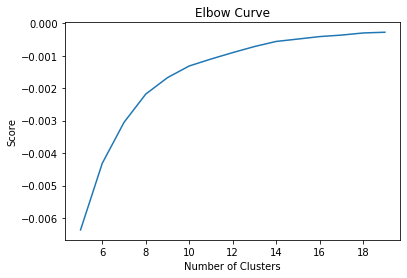

In [127]:
x=df.loc[:,['Service Request Number','Latitude','Longitude']]

K_clusters = range(5,20)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['Latitude']]
X_axis = df[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [128]:
kmeans = KMeans(n_clusters = 9, init ='k-means++')
kmeans.fit(x[x.columns[1:3]]) # Compute k-means clustering.x
x['cluster_label'] = kmeans.fit_predict(x[x.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(x[x.columns[1:3]]) # Labels of each point
x.head(5)

,Service Request Number,Latitude,Longitude,cluster_label
0,19-00887344,39.367006,-76.703261,7
1,20-00001618,39.309973,-76.645108,4
2,20-00051494,39.320414,-76.686448,7
3,20-00109697,39.338047,-76.667880,7
4,20-00126265,39.338715,-76.670654,7


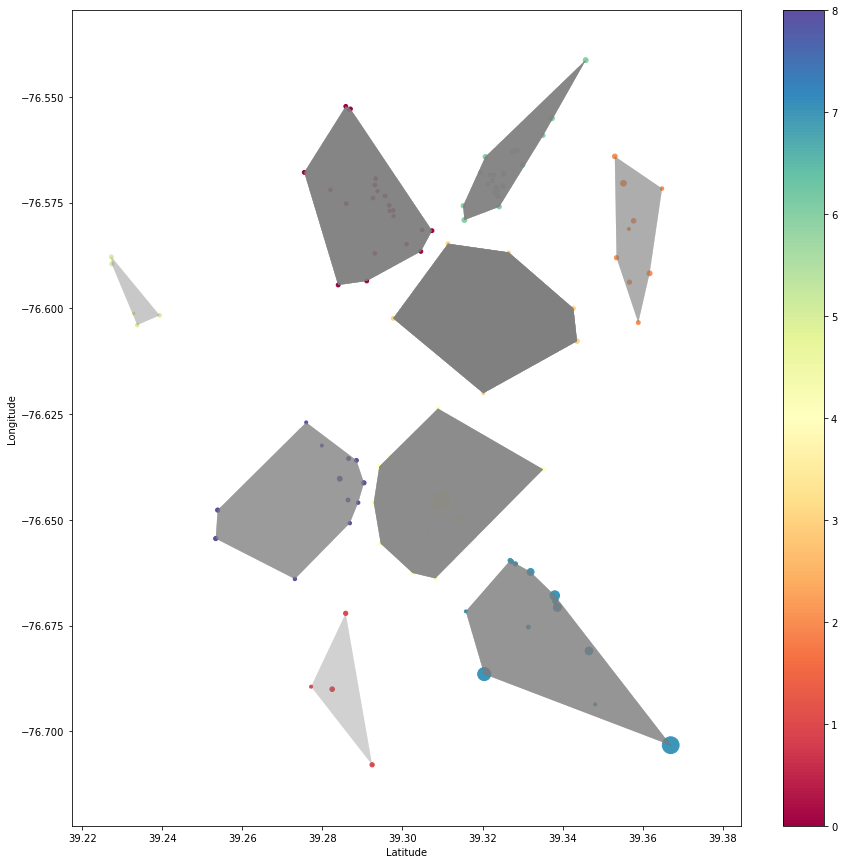

In [133]:
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull

def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)
    
fig, ax = plt.subplots(figsize=(15,15))
x.plot.scatter(x='Latitude', y='Longitude', c=labels, s=df['Days Overdue']*3, cmap='Spectral', ax=ax)
#ax=plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.75)

for i in x["cluster_label"]:
    j=x.loc[x["cluster_label"]==i]
    encircle(j["Latitude"], j["Longitude"], fc='gray', alpha=0.1)

In [91]:
clustered_data = df.merge(x, left_on='Service Request Number', right_on='Service Request Number')
clustered_data.sort_values(by="cluster_label")

,Notes from Sara,Overdue_Status,CompletebyApril,geo_sw_quad,Service Request Number,SR Type,Due Date,Created Date,assigned_to,SR Status,Street Address,Neighborhood,Block_Number_c,Latitude_x,Longitude_x,Days Overdue,Latitude_y,Longitude_y,cluster_label
0,Priority,Overdue,Must Complete,NORTHWEST,19-00887344,SW-Dirty Alley,2019-12-31 12:36:45,2019-12-22 12:36:45,NaN,Pending,"7035 WALLIS AVE, BC",Cross Country,7000.0,39.367006,-76.703261,94,39.367006,-76.703261,0
82,Overdue by April 1,Not Overdue,Must Complete,NORTHWEST,20-00184350,SW-Dirty Alley,2020-03-31 14:29:36,2020-03-22 14:29:36,NaN,New,"2514 N ELLAMONT ST, Baltimore City, 21216",Hanlon-Longwood,2500.0,39.315833,-76.671625,3,39.315833,-76.671625,0
80,Overdue by April 1,Not Overdue,Must Complete,NORTHWEST,20-00182338,SW-Dirty Alley,2020-03-31 14:00:38,2020-03-20 14:00:38,NaN,New,"3800 COPLEY RD, Baltimore City, 21215",Ashburton,3800.0,39.331447,-76.675341,5,39.331447,-76.675341,0
42,Overdue by April 1,Not Overdue,Must Complete,NORTHWEST,20-00178708,SW-Dirty Alley,2020-03-30 11:15:21,2020-03-19 11:15:21,NaN,New,"2805 HILLDALE AVE, Baltimore City, 21215",Park Circle,2800.0,39.327208,-76.659840,6,39.327208,-76.659840,0
43,Overdue by April 1,Not Overdue,Must Complete,NORTHWEST,20-00178716,SW-Dirty Alley,2020-03-30 11:17:16,2020-03-19 11:17:16,NaN,New,"2804 SUFFOLK AVE, Baltimore City, 21215",Park Circle,2800.0,39.326899,-76.659605,6,39.326899,-76.659605,0
44,Overdue by April 1,Not Overdue,Must Complete,NORTHWEST,20-00178833,SW-Dirty Alley,2020-03-30 11:33:42,2020-03-19 11:33:43,NaN,Pending,"2821 W COLD SPRING LN, Baltimore City, 21215",Towanda-Grantley,2800.0,39.338134,-76.669243,6,39.338134,-76.669243,0
45,Overdue by April 1,Not Overdue,Must Complete,NORTHWEST,20-00178842,SW-Dirty Alley,2020-03-30 11:35:24,2020-03-19 11:35:24,NaN,Pending,"2813 W COLD SPRING LN, Baltimore City, 21215",Towanda-Grantley,2800.0,39.338317,-76.668958,6,39.338317,-76.668958,0
79,Overdue by April 1,Not Overdue,Must Complete,NORTHWEST,20-00184219,SW-Dirty Alley,2020-03-31 12:30:43,2020-03-22 12:30:43,NaN,New,"MORTIMER AVE & NOME AVE, Baltimore City, 21215",Reisterstown Station,NaN,39.348148,-76.693624,3,39.348148,-76.693624,0
6,Priority,Overdue,Must Complete,NORTHWEST,20-00138625,SW-Dirty Alley,2020-03-18 11:02:59,2020-03-09 11:02:59,NaN,New,"3817 REISTERSTOWN RD, Baltimore City, 21215",Park Circle,3800.0,39.332007,-76.662309,16,39.332007,-76.662309,0
5,Priority,Overdue,Must Complete,NORTHWEST,20-00131475,SW-Dirty Alley,2020-03-16 11:54:20,2020-03-05 10:54:20,NaN,Pending,"5202 CUTHBERT AVE, Baltimore City, 21215",Arlington,5200.0,39.346593,-76.680971,20,39.346593,-76.680971,0


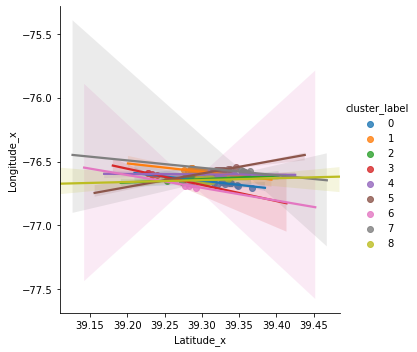

In [125]:
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull

def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)
    
facet = sns.lmplot(data=clustered_data, x='Latitude_x', y='Longitude_x', hue='cluster_label', legend=True, legend_out=True)

#colors={0:'red', 1:'orange', 2:'yellow', 3:'light green', 4:'dark green', 5:'light blue', 6:'blue', 
#        7:'dark blue', 8:'purple', 9:'gold'}

encircle(clustered_data["Latitude_x"], clustered_data["Longitude_x"], fc='gray', alpha=0.25)

In [ ]:
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)

coords=test[['Longitude', 'Latitude']] #.apply(tuple, axis=1)
db = DBSCAN(eps=.5/6371., min_samples=15, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

centermost_points = clusters.map(get_centermost_point)
lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'lon':lons, 'lat':lats})
rs = rep_points.apply(lambda row: df[(df['lat']==row['lat']) & (df['lon']==row['lon'])].iloc[0], axis=1)

fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rs['lon'], rs['lat'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
df_scatter = ax.scatter(df['lon'], df['lat'], c='k', alpha=0.9, s=3)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()